In [ ]:
import cv2
import numpy as np
import matplotlib
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

length, width = 640 , 400

def func1(inp):
    img = cv2.imread(inp)
    img = cv2.resize(img, (length, width))
    image = cv2.cvtColor(img,cv2.COLOR_BGR2HLS)
    lower = np.uint8([0, 200, 0])
    upper = np.uint8([255, 255, 255])
    white_mask = cv2.inRange(image, lower, upper)

    lower = np.uint8([10, 0,   100])
    upper = np.uint8([40, 255, 255])
    yellow_mask = cv2.inRange(image, lower, upper)
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    result = img.copy()

    # cv2_imshow(mask)
    return mask

In [ ]:
def func11(inp):
    image = func1(inp)


    # Thresholding to create a binary image
    _, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    # cv2_imshow(image)

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours were found
    if contours:
        # Find the largest contour, which is likely the "H"
        largest_contour = max(contours, key=cv2.contourArea)

        # Compute the center of the contour using moments
        M = cv2.moments(largest_contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0

        # Draw the center of "H" on the image
        output_image = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)  # Convert to BGR for color drawing
        cv2.circle(output_image, (cX, cY), 10, (0, 0, 255), -1)
        cv2.putText(output_image, "Center", (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        # Save or display the image
        cv2_imshow(output_image)
    else:
        print("No contours found in the image.")




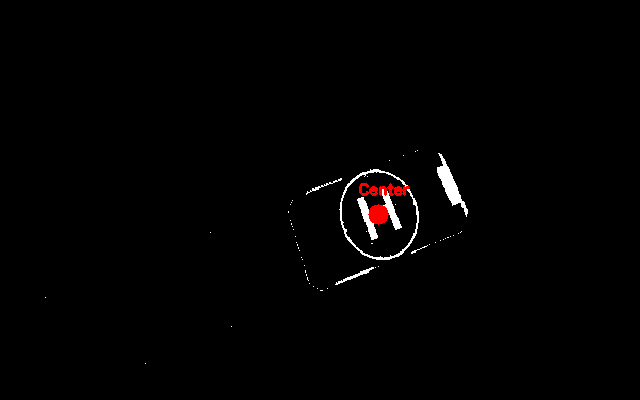

In [ ]:
func11("4.png")
# func1("2.png")
# func1("3.png")
# func1("4.png")

In [ ]:
def func12(inp):
    img = func1(inp)

    # The image is already a mask (grayscale), so no need to convert it to grayscale again
    gray = img  # The output from func1 is already a single-channel image

    # Apply Gaussian blur to reduce noise and improve circle detection
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)


    # Apply Hough Circle Transform to detect circles
    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp=1.2,  # Inverse ratio of the accumulator resolution to the image resolution
        minDist=500,  # Minimum distance between detected centers
        param1=70,  # Higher threshold for Canny edge detector
        param2=50,  # Accumulator threshold for circle detection
        minRadius=10,  # Minimum radius to be detected
        maxRadius=0  # Maximum radius to be detected (0 means no max limit)
    )
    output_image = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    # Ensure at least one circle was found
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")

        for (x, y, r) in circles:

            cv2.circle(output_image, (x, y), r, (0, 255, 0), 4)
            cv2.circle(output_image, (x, y), 10, (0, 0, 255), -1)
            cv2.putText(output_image, "Center", (x - 20, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)


    cv2_imshow(output_image)


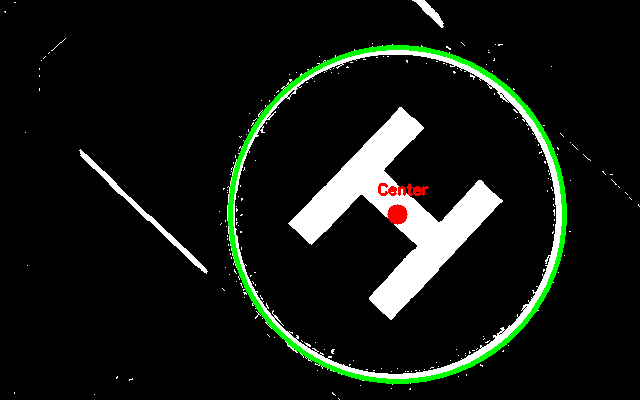

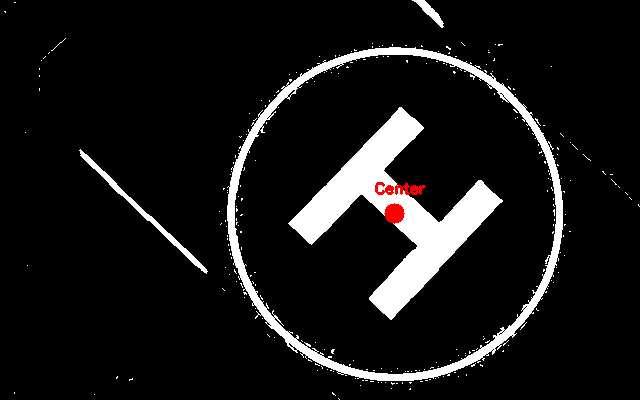

In [ ]:
func12("1.png")
func11("1.png")